# BITCOIN PREDICTION

### Getting Started

In [1]:
import numpy as np
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pandas import DataFrame

In [2]:
FILENAME = "BTC.csv"
datafile = pd.read_csv(FILENAME)
datafile.head()

,index,date,price,total_volume,market_cap,coin_name
0,1,1/1/2015,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2,1/2/2015,314.446,3.885591e+07,4.301448e+09,bitcoin
2,3,1/3/2015,286.572,1.187789e+08,3.921358e+09,bitcoin
3,4,1/4/2015,260.936,2.055001e+08,3.571640e+09,bitcoin
4,5,1/5/2015,273.220,1.550381e+08,3.740880e+09,bitcoin


In [3]:
datafile.describe()

,index,price,total_volume,market_cap
count,2938.000000,2938.000000,2.938000e+03,2.937000e+03
mean,1469.500000,13352.650275,1.698026e+10,2.472976e+11
std,848.271871,16277.186580,2.313031e+10,3.079666e+11
min,1.000000,172.147900,1.823845e+07,2.362640e+09
25%,735.250000,897.687200,1.035989e+09,1.445143e+10
50%,1469.500000,7394.947845,6.232231e+09,1.307080e+11
75%,2203.750000,17702.184730,2.738961e+10,3.295450e+11
max,2938.000000,67617.015540,4.293080e+11,1.278800e+12


In [4]:
datafile.columns

Index(['index', 'date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')

In [5]:
datafile = datafile.dropna(axis=0)

In [6]:
#Selecting The Prediction Target
y = datafile['price']

In [7]:
datafile_features = ['total_volume', 'market_cap']
X = datafile[datafile_features]
X

,total_volume,market_cap
0,4.699936e+07,4.293958e+09
1,3.885591e+07,4.301448e+09
2,1.187789e+08,3.921358e+09
3,2.055001e+08,3.571640e+09
4,1.550381e+08,3.740880e+09
...,...,...
2933,4.802511e+10,3.633810e+11
2934,3.951442e+10,3.826750e+11
2935,4.949871e+10,4.052100e+11
2936,2.307213e+10,4.016970e+11


In [8]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
data_model = DecisionTreeRegressor(random_state=1)

# Fit model
data_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [9]:
print("Making predictions for the following Cases:")
print(X)
print("The predictions are")
print(data_model.predict(X))

Making predictions for the following Cases:
      total_volume    market_cap
0     4.699936e+07  4.293958e+09
1     3.885591e+07  4.301448e+09
2     1.187789e+08  3.921358e+09
3     2.055001e+08  3.571640e+09
4     1.550381e+08  3.740880e+09
...            ...           ...
2933  4.802511e+10  3.633810e+11
2934  3.951442e+10  3.826750e+11
2935  4.949871e+10  4.052100e+11
2936  2.307213e+10  4.016970e+11
2937  3.480939e+10  4.077600e+11

[2937 rows x 2 columns]
The predictions are
[  313.992     314.446     286.572   ... 21019.20661 20853.23057
 21175.33774]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train=datafile[:2400]
test=datafile[2400:]
train_features = ['total_volume', 'market_cap']
X_train = train[train_features]
Y_train = train['price']
X_val = test[train_features]
Y_val = test['price']

data_model = DecisionTreeRegressor()
# Fit model
data_model.fit(X_train, Y_train)

# get predicted prices on validation data
val_predictions = data_model.predict(X_val)
print(mean_absolute_error(Y_val, val_predictions))

620.7531672998136


In [14]:
train

,index,date,price,total_volume,market_cap,coin_name
0,1,1/1/2015,313.99200,4.699936e+07,4.293958e+09,bitcoin
1,2,1/2/2015,314.44600,3.885591e+07,4.301448e+09,bitcoin
2,3,1/3/2015,286.57200,1.187789e+08,3.921358e+09,bitcoin
3,4,1/4/2015,260.93600,2.055001e+08,3.571640e+09,bitcoin
4,5,1/5/2015,273.22000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...,...
2396,2397,7/25/2021,34213.59993,2.212032e+10,6.420130e+11,bitcoin
2397,2398,7/26/2021,35456.12466,2.092908e+10,6.646810e+11,bitcoin
2398,2399,7/27/2021,37281.91809,5.355049e+10,7.019210e+11,bitcoin
2399,2400,7/28/2021,39076.59377,3.640129e+10,7.323120e+11,bitcoin


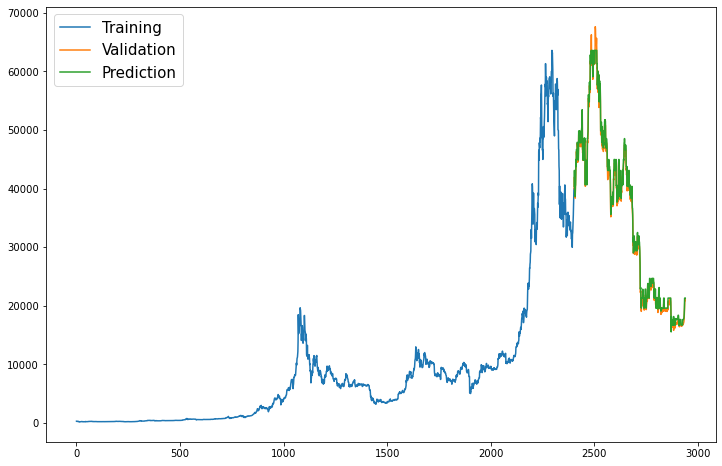

In [15]:
plt.figure(figsize=(12,8))
plt.plot(train['index'], Y_train, label = 'Training')    
plt.plot(test['index'], Y_val, label = 'Validation')  
plt.plot(test['index'], val_predictions, label ='Prediction')
plt.legend(loc='best', fontsize=15)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, Y_train)
Btc_preds = forest_model.predict(X_val)
print(mean_absolute_error(Y_val, Btc_preds))

680.5593368277455


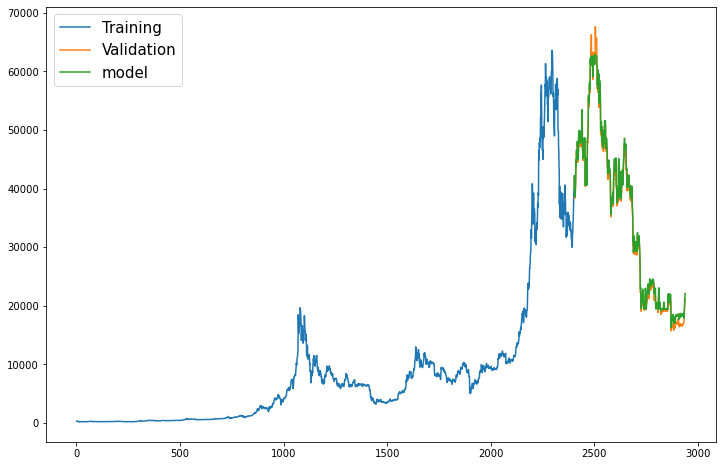

In [17]:
plt.figure(figsize=(12,8))
plt.plot(train['index'], Y_train, label ='Training')    
plt.plot(test['index'], Y_val, label ='Validation')  
plt.plot(test['index'], Btc_preds, label ='model') 
plt.legend(loc='best', fontsize=15)

In [18]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
predictions = my_model.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, Y_val)))

Mean Absolute Error: 698.3438418616155


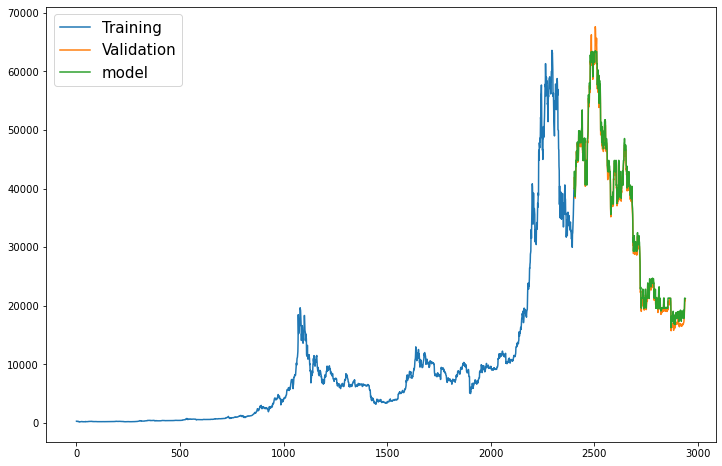

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train['index'], Y_train, label ='Training')    
plt.plot(test['index'], Y_val, label ='Validation')  
plt.plot(test['index'], predictions, label ='model') 
plt.legend(loc='best', fontsize=15)